In [1]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# %matplotlib qt

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Import dataset

In [2]:
turbine = 'T09'
path_dataset = f'../dataset/df_turbine_{turbine}.json'

## dataset

In [3]:
df = pd.read_json(path_dataset)
df.set_index('timestamp', inplace=True)
df.sort_index(ascending=True,inplace=True)
df.head()

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-01-01 00:00:00        T09              46.0       1272.0   
2016-01-01 00:10:00        T09              60.7       1321.4   
2016-01-01 00:20:00        T09             191.6       1363.4   
2016-01-01 00:30:00        T09             231.1       1379.7   
2016-01-01 00:40:00        T09             169.9       1426.9   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-01-01 00:00:00                  0.6             198.4   
2016-01-01 00:10:00                  0.5             231.1   
2016-01-01 00:20:00                  0.4             312.3   
2016-01-01 00:30:00                 -1.2             398.8   
2016-01-01 00:40:00                 -1.4             366.3   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                220.1               40.0   
2016-01-01 00:10:00                218.7               40.0   
2016-01-01 00:20:00                216.7               40.0   
2016-01-01 00:30:00                197.9               41.0   
2016-01-01 00:40:00                217.2               41.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-01-01 00:00:00                1.8                  -72.7   
2016-01-01 00:10:00                2.0                  -76.7   
2016-01-01 00:20:00                1.4                  -33.6   
2016-01-01 00:30:00                2.4                  -88.4   
2016-01-01 00:40:00                1.9                  -92.0   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-01-01 00:00:00                  161.5  ...                   402.0   
2016-01-01 00:10:00                  190.5  ...                   401.8   
2016-01-01 00:20:00                  249.2  ...                   401.2   
2016-01-01 00:30:00                  319.2  ...                   400.7   
2016-01-01 00:40:00                  294.4  ...                   400.0   

                     grd_prod_psblepwr_std  grd_prod_cosphi_avg  \
timestamp                                                         
2016-01-01 00:00:00                   61.5                  0.9   
2016-01-01 00:10:00                   86.4                  0.9   
2016-01-01 00:20:00                   45.1                  1.0   
2016-01-01 00:30:00                   86.3                  1.0   
2016-01-01 00:40:00                   64.5                  1.0   

                     prod_latestavg_actpwrgen0  prod_latestavg_actpwrgen1  \
timestamp                                                                   
2016-01-01 00:00:00                        0.0                    33173.0   
2016-01-01 00:10:00                        0.0                    38381.0   
2016-01-01 00:20:00                        0.0                    52055.0   
2016-01-01 00:30:00                        0.0                    66365.0   
2016-01-01 00:40:00                        0.0                    60980.0   

                     prod_latestavg_actpwrgen2  rtr_rpm_std  component  \
timestamp                                                                
2016-01-01 00:00:00                        0.0          0.2       None   
2016-01-01 00:10:00                        0.0          0.4       None   
2016-01-01 00:20:00                        0.0          0.3       None   
2016-01-01 00:30:00                        0.0          0.7       None   
2016-01-01 00:40:00                        0.0          0.4       None   

                     remarks  failure  
timestamp                              
2016-01-01 00:00:00     None        0  
2016-01-01 00:10:00     None        0  
2016-01-01 00:20

## check number of failures

In [4]:
df.loc[~df['component'].isnull(),['turbine_id','component', 'remarks','failure']]


turbine_id          component  \
timestamp                                           
2016-06-07 16:59:00        T09  GENERATOR_BEARING   
2016-08-22 18:25:00        T09  GENERATOR_BEARING   
2016-10-11 08:06:00        T09            GEARBOX   
2016-10-17 09:19:00        T09  GENERATOR_BEARING   
2017-01-25 12:55:00        T09  GENERATOR_BEARING   

                                                   remarks  failure  
timestamp                                                            
2016-06-07 16:59:00  High tempemperature generator bearing        1  
2016-08-22 18:25:00     High temperature generator bearing        1  
2016-10-11 08:06:00                       Gearbox repaired        1  
2016-10-17 09:19:00            Generator bearings replaced        1  
2017-01-25 12:55:00            Generator bearings replaced        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87161 entries, 2016-01-01 00:00:00 to 2017-09-01 00:00:00
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   turbine_id                   87161 non-null  object 
 1   grd_prod_pwr_min             87156 non-null  float64
 2   gen_rpm_avg                  87156 non-null  float64
 3   blds_pitchangle_max          87156 non-null  float64
 4   grd_prod_pwr_avg             87156 non-null  float64
 5   amb_winddir_abs_avg          87156 non-null  float64
 6   gen_bear_temp_avg            87153 non-null  float64
 7   amb_windspeed_min            87156 non-null  float64
 8   grd_prod_reactpwr_max        87156 non-null  float64
 9   grd_prod_curphse1_avg        87156 non-null  float64
 10  grd_prod_pwr_max             87156 non-null  float64
 11  grd_prod_pwr_std             87156 non-null  float64
 12  blds_pitchangle_min          87156 non-

In [6]:
datatypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
datatypes['dtypes'].value_counts()

float64    81
object      3
int64       1
Name: dtypes, dtype: int64

In [7]:
datatypes[datatypes['dtypes'] == 'int64']

dtypes
failure  int64

There is only 3 columns as string

In [8]:
tags_float = datatypes[datatypes['dtypes'] == 'float'].index.tolist()
tags_str = datatypes[datatypes['dtypes'] == 'object'].index.tolist()
tags_int = datatypes[datatypes['dtypes'] == 'int64'].index.tolist()


## Check Duplicates

In [9]:
df[df.index.duplicated(keep=False)]

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-10-30 02:00:00        T09             835.6       1660.8   
2016-10-30 02:00:00        T09            1168.6       1675.4   
2016-10-30 02:10:00        T09            1304.2       1674.6   
2016-10-30 02:10:00        T09            1041.2       1666.1   
2016-10-30 02:20:00        T09            1410.3       1675.4   
2016-10-30 02:20:00        T09             959.4       1663.7   
2016-10-30 02:30:00        T09            1333.2       1679.6   
2016-10-30 02:30:00        T09             877.4       1662.0   
2016-10-30 02:40:00        T09            1173.1       1672.6   
2016-10-30 02:40:00        T09            1006.9       1664.8   
2016-10-30 02:50:00        T09            1059.4       1668.3   
2016-10-30 02:50:00        T09             962.7       1661.4   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-10-30 02:00:00                  4.6            1545.6   
2016-10-30 02:00:00                  9.8            1860.1   
2016-10-30 02:10:00                  9.4            1889.9   
2016-10-30 02:10:00                  6.0            1657.8   
2016-10-30 02:20:00                  8.6            1908.0   
2016-10-30 02:20:00                  5.8            1694.7   
2016-10-30 02:30:00                  9.8            1938.5   
2016-10-30 02:30:00                  0.3            1435.2   
2016-10-30 02:40:00                  7.5            1779.5   
2016-10-30 02:40:00                  1.0            1508.6   
2016-10-30 02:50:00                  4.6            1637.8   
2016-10-30 02:50:00                  0.5            1493.8   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-10-30 02:00:00                107.3               68.0   
2016-10-30 02:00:00                123.4               63.0   
2016-10-30 02:10:00                 95.8               64.0   
2016-10-30 02:10:00                111.4               69.0   
2016-10-30 02:20:00                108.5               65.0   
2016-10-30 02:20:00                103.7               69.0   
2016-10-30 02:30:00                103.6               66.0   
2016-10-30 02:30:00                 95.0               69.0   
2016-10-30 02:40:00                 89.9               67.0   
2016-10-30 02:40:00                106.5               69.0   
2016-10-30 02:50:00                116.5               68.0   
2016-10-30 02:50:00                112.7               69.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-10-30 02:00:00                3.7                 -198.2   
2016-10-30 02:00:00                1.7                 -211.7   
2016-10-30 02:10:00                2.1                 -215.8   
2016-10-30 02:10:00                1.2                 -201.6   
2016-10-30 02:20:00                2.5                 -216.9   
2016-10-30 02:20:00                1.5                 -203.3   
2016-10-30 02:30:00                4.2                 -216.1   
2016-10-30 02:30:00                2.4                 -201.5   
2016-10-30 02:40:00                1.9                 -206.7   
2016-10-30 02:40:00                2.2                 -204.2   
2016-10-30 02:50:00                2.3                 -201.4   
2016-10-30 02:50:00                2.4                 -201.2   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-10-30 02:00:00                 1296.4  ...                   399.5   
2016-10-30 02:00:00                 1552.9  ...                   401.4   
2016-10-30 02:10:00                 1583.2  ...                   399.5   
2016-10-30 02:10:00                 1387.3  ...                   400.4

In [10]:
print(f'before {df.shape}')
df = df[~df.index.duplicated(keep='first')]
print(f'after {df.shape}')


before (87161, 85)
after (87155, 85)


## Splitting Training and Test Set

In [11]:
training_set = df.loc['2016-01-01':'2016-12-31'].copy()
test_set =  df.loc['2017-01-01':'2017-12-31'].copy()

# Analyse Training Set

There is many many columns to analyse, so in order to make it simple and reduce the dataset 

# Numerical Variables

## Check for Missing Data

In [12]:
pct_null = df.isnull().sum() /df.shape[0]
pct_null.sort_values(ascending=False)


component                  0.999943
remarks                    0.999943
gen_bear_temp_avg          0.000092
grd_prod_cosphi_avg        0.000092
rtr_rpm_std                0.000057
                             ...   
grd_busbar_temp_avg        0.000057
grd_prod_psblepwr_min      0.000057
hvtrafo_phase2_temp_avg    0.000057
turbine_id                 0.000000
failure                    0.000000
Length: 85, dtype: float64

The columns don't have high percentage of null data

## Check for Inf values

In [13]:
# check for infinite values
d = ~np.isfinite(training_set[tags_float])
d.sum()

grd_prod_pwr_min             4
gen_rpm_avg                  4
blds_pitchangle_max          4
grd_prod_pwr_avg             4
amb_winddir_abs_avg          4
                            ..
grd_prod_cosphi_avg          4
prod_latestavg_actpwrgen0    4
prod_latestavg_actpwrgen1    4
prod_latestavg_actpwrgen2    4
rtr_rpm_std                  4
Length: 81, dtype: int64

In [14]:
# replace inf values
training_set[tags_float] = training_set[tags_float].replace([np.inf, -np.inf], np.nan)

## Fillna

In [15]:
# fillna
training_set[tags_float] = training_set[tags_float].fillna(method='backfill')

In [16]:
pct_null = training_set[tags_float].isnull().sum() /training_set[tags_float].shape[0]
pct_null.sort_values(ascending=False)


grd_prod_pwr_min          0.0
nac_temp_avg              0.0
gen_bear2_temp_avg        0.0
gen_rpm_max               0.0
amb_windspeed_est_avg     0.0
                         ... 
amb_windspeed_avg         0.0
grd_prod_voltphse3_avg    0.0
grd_busbar_temp_avg       0.0
grd_prod_psblepwr_min     0.0
rtr_rpm_std               0.0
Length: 81, dtype: float64

In [17]:
training_set_float = training_set[tags_float].copy()

## Check for tags with high correlation and drop one of them - VIF

In [18]:
vif_saved = False

if vif_saved == True:
    pass
else:
    print(f'Started at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    start_time = time.time()

    # Scaling first to ease the calculations
    scaler = StandardScaler()

    X = training_set_float.copy()
    X_scaled = scaler.fit_transform(X)

    # Keep DataFrame indexes ---------------------------------------------------------
    X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

    vif_factor_threshold = 5
    iter = 1
    span_tags_to_remove = 1

    while iter > 0:
        print(f'\r{len(X_scaled.columns)}', end="")

        vif = pd.DataFrame()
        vif["features"] = X_scaled.columns
        vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
        vif_high = vif.sort_values(by=['VIF Factor'], ascending=False)

        if vif_high[vif_high['VIF Factor'] > vif_factor_threshold].shape[0] == 0:
            iter = 0
        else:
            tag_name = vif_high[vif_high['VIF Factor'] > vif_factor_threshold].iloc[:span_tags_to_remove]['features']
            cols = X_scaled.columns.tolist()
            for t in tag_name:
                cols.remove(t)
            X_scaled = X_scaled[cols].copy()

    execution = "--- %s minutes ---" + str(round((time.time() - start_time)/60,2))
    print(f'Ended at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    print(f'duration: {execution}')

    display(vif_high)

Started at --- 2021-11-11 07:53:06.337228
81

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\regression\linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


22Ended at --- 2021-11-11 08:30:55.206262
duration: --- %s minutes ---37.81


features  VIF Factor
6          cont_vcp_wtrtemp_avg    4.896323
5         grd_prod_psblecap_min    4.430704
21                  rtr_rpm_std    4.217636
18          blds_pitchangle_std    4.204652
19    prod_latestavg_actpwrgen0    3.282566
12          blds_pitchangle_avg    3.133027
16            amb_windspeed_max    3.042708
8             cont_hub_temp_avg    2.925005
9         grd_prod_psbleind_std    2.913573
11            nac_direction_avg    2.603831
13           gen_bear2_temp_avg    2.602845
0           amb_winddir_abs_avg    2.468885
1             amb_windspeed_min    2.430779
3       hvtrafo_phase1_temp_avg    2.203156
2              grd_prod_pwr_std    2.188955
15             hyd_oil_temp_avg    1.462724
7         grd_prod_reactpwr_std    1.367099
14       grd_prod_voltphse2_avg    1.150967
4      amb_winddir_relative_avg    1.009330
17            grd_prod_freq_avg    1.000628
10  prod_latestavg_reactpwrgen2         NaN
20    prod_latestavg_actpwrgen2         NaN

In [19]:
vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
vif_high.to_json(vif_filename)

In [20]:
vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
vif_high = pd.read_json(vif_filename)
vif_high

features  VIF Factor
6          cont_vcp_wtrtemp_avg    4.896323
5         grd_prod_psblecap_min    4.430704
21                  rtr_rpm_std    4.217636
18          blds_pitchangle_std    4.204652
19    prod_latestavg_actpwrgen0    3.282566
12          blds_pitchangle_avg    3.133027
16            amb_windspeed_max    3.042708
8             cont_hub_temp_avg    2.925005
9         grd_prod_psbleind_std    2.913573
11            nac_direction_avg    2.603831
13           gen_bear2_temp_avg    2.602845
0           amb_winddir_abs_avg    2.468885
1             amb_windspeed_min    2.430779
3       hvtrafo_phase1_temp_avg    2.203156
2              grd_prod_pwr_std    2.188955
15             hyd_oil_temp_avg    1.462724
7         grd_prod_reactpwr_std    1.367099
14       grd_prod_voltphse2_avg    1.150967
4      amb_winddir_relative_avg    1.009330
17            grd_prod_freq_avg    1.000628
10  prod_latestavg_reactpwrgen2         NaN
20    prod_latestavg_actpwrgen2         NaN

In [21]:
print(f'Frmo 80 columns noe we have {vif_high.shape[0]}')

tags_float_red = vif_high['features'].values
training_set_float_red = training_set_float[tags_float_red]
training_set_float_red

Frmo 80 columns noe we have 22


cont_vcp_wtrtemp_avg  grd_prod_psblecap_min  rtr_rpm_std  \
timestamp                                                                       
2016-01-01 00:00:00                  38.0                  224.5          0.2   
2016-01-01 00:10:00                  38.0                  293.3          0.4   
2016-01-01 00:20:00                  38.0                  904.9          0.3   
2016-01-01 00:30:00                  38.0                 1000.0          0.7   
2016-01-01 00:40:00                  38.0                  730.8          0.4   
...                                   ...                    ...          ...   
2016-12-31 23:10:00                  39.0                 1000.0          0.5   
2016-12-31 23:20:00                  38.0                 1000.0          0.7   
2016-12-31 23:30:00                  38.0                 1000.0          0.5   
2016-12-31 23:40:00                  38.0                  948.7          0.4   
2016-12-31 23:50:00                  38.0                 1000.0          0.8   

                     blds_pitchangle_std  prod_latestavg_actpwrgen0  \
timestamp                                                             
2016-01-01 00:00:00                  0.5                        0.0   
2016-01-01 00:10:00                  0.6                        0.0   
2016-01-01 00:20:00                  0.2                        0.0   
2016-01-01 00:30:00                  0.3                        0.0   
2016-01-01 00:40:00                  0.1                        0.0   
...                                  ...                        ...   
2016-12-31 23:10:00                  0.1                        0.0   
2016-12-31 23:20:00                  0.1                        0.0   
2016-12-31 23:30:00                  0.2                        0.0   
2016-12-31 23:40:00                  0.2                        0.0   
2016-12-31 23:50:00                  0.1                        0.0   

                     blds_pitchangle_avg  amb_windspeed_max  \
timestamp                                                     
2016-01-01 00:00:00                 -1.3                9.9   
2016-01-01 00:10:00                 -1.6                9.1   
2016-01-01 00:20:00                 -1.9               11.2   
2016-01-01 00:30:00                 -1.9               10.1   
2016-01-01 00:40:00                 -2.0               11.7   
...                                  ...                ...   
2016-12-31 23:10:00                 -2.1               11.0   
2016-12-31 23:20:00                 -2.1               11.4   
2016-12-31 23:30:00                 -2.1               11.2   
2016-12-31 23:40:00                 -1.9                9.1   
2016-12-31 23:50:00                 -2.1               10.4   

                     cont_hub_temp_avg  grd_prod_psbleind_std  \
timestamp                                                       
2016-01-01 00:00:00               27.0                  185.5   
2016-01-01 00:10:00               27.0                  227.4   
2016-01-01 00:20:00               27.0                    4.2   
2016-01-01 00:30:00               27.0                    0.0   
2016-01-01 00:40:00               27.0                   13.9   
...                                ...                    ...   
2016-12-31 23:10:00               23.0                    0.0   
2016-12-31 23:20:00               23.0                    0.0   
2016-12-31 23:30:00               23.0                    0.0   
2016-12-31 23:40:00               23.0                    1.4   
2016-12-31 23:50:00               23.0                    0.0   

                     nac_direction_avg  ...  amb_windspeed_min  \
timestamp                               ...                      
2016-01-01 00:00:00              214.0  ...                1.8   
2016-01-01 00:10:00              214.0  ...                2.0   
2016-01-01 00:20:00              214.0  ...                1.4   
2016-01-01 00:30:00              214.0  ...    

### Check for low variance 

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
x = training_set_float_red.std(numeric_only=True).sort_values(ascending=True)
display(x)

tags_float_drop = x[x<=1].index
print('************* DROPPED TAGS *************')
display(tags_float_drop)

tags_float_red = x[x>1].index
training_set_float_red = training_set_float_red[tags_float_red]
print(training_set_float_red.shape)
training_set_float_red


prod_latestavg_actpwrgen2       0.000
prod_latestavg_reactpwrgen2     0.000
grd_prod_freq_avg               0.012
rtr_rpm_std                     1.032
amb_windspeed_min               1.094
grd_prod_voltphse2_avg          1.488
hyd_oil_temp_avg                3.692
blds_pitchangle_std             4.356
cont_vcp_wtrtemp_avg            5.130
cont_hub_temp_avg               5.323
amb_windspeed_max               6.620
hvtrafo_phase1_temp_avg         8.484
gen_bear2_temp_avg             16.732
blds_pitchangle_avg            17.056
amb_winddir_relative_avg       33.492
grd_prod_reactpwr_std          38.035
nac_direction_avg              94.426
amb_winddir_abs_avg            94.590
grd_prod_psbleind_std          99.821
grd_prod_pwr_std              111.773
grd_prod_psblecap_min         359.645
prod_latestavg_actpwrgen0     806.421
dtype: float64

************* DROPPED TAGS *************


Index(['prod_latestavg_actpwrgen2', 'prod_latestavg_reactpwrgen2',
       'grd_prod_freq_avg'],
      dtype='object')

(52371, 19)


rtr_rpm_std  amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                                     
2016-01-01 00:00:00        0.200              1.800                 399.500   
2016-01-01 00:10:00        0.400              2.000                 399.500   
2016-01-01 00:20:00        0.300              1.400                 398.800   
2016-01-01 00:30:00        0.700              2.400                 398.500   
2016-01-01 00:40:00        0.400              1.900                 397.800   
...                          ...                ...                     ...   
2016-12-31 23:10:00        0.500              3.800                 397.200   
2016-12-31 23:20:00        0.700              3.600                 397.000   
2016-12-31 23:30:00        0.500              3.200                 397.200   
2016-12-31 23:40:00        0.400              3.500                 397.200   
2016-12-31 23:50:00        0.800              3.100                 397.800   

                     hyd_oil_temp_avg  blds_pitchangle_std  \
timestamp                                                    
2016-01-01 00:00:00            44.000                0.500   
2016-01-01 00:10:00            44.000                0.600   
2016-01-01 00:20:00            44.000                0.200   
2016-01-01 00:30:00            44.000                0.300   
2016-01-01 00:40:00            44.000                0.100   
...                               ...                  ...   
2016-12-31 23:10:00            43.000                0.100   
2016-12-31 23:20:00            43.000                0.100   
2016-12-31 23:30:00            42.000                0.200   
2016-12-31 23:40:00            42.000                0.200   
2016-12-31 23:50:00            42.000                0.100   

                     cont_vcp_wtrtemp_avg  cont_hub_temp_avg  \
timestamp                                                      
2016-01-01 00:00:00                38.000             27.000   
2016-01-01 00:10:00                38.000             27.000   
2016-01-01 00:20:00                38.000             27.000   
2016-01-01 00:30:00                38.000             27.000   
2016-01-01 00:40:00                38.000             27.000   
...                                   ...                ...   
2016-12-31 23:10:00                39.000             23.000   
2016-12-31 23:20:00                38.000             23.000   
2016-12-31 23:30:00                38.000             23.000   
2016-12-31 23:40:00                38.000             23.000   
2016-12-31 23:50:00                38.000             23.000   

                     amb_windspeed_max  hvtrafo_phase1_temp_avg  \
timestamp                                                         
2016-01-01 00:00:00              9.900                   68.000   
2016-01-01 00:10:00              9.100                   68.000   
2016-01-01 00:20:00             11.200                   68.000   
2016-01-01 00:30:00             10.100                   68.000   
2016-01-01 00:40:00             11.700                   68.000   
...                                ...                      ...   
2016-12-31 23:10:00             11.000                   62.000   
2016-12-31 23:20:00             11.400                   63.000   
2016-12-31 23:30:00             11.200                   63.000   
2016-12-31 23:40:00              9.100                   63.000   
2016-12-31 23:50:00             10.400                   63.000   

                     gen_bear2_temp_avg  blds_pitchangle_avg  \
timestamp                                                      
2016-01-01 00:00:00              33.000               -1.300   
2016-01-01 00:10:00              33.000               -1.600   
2016-01-01 00:20:00              33.000               -1.900   
2016-01-01 00:30:00              33.000               -1.900   
2016-01-01 00:40:00              34.000               -2.000   
...                              

### Check Different Types of Correlations

In [23]:
# Correlation

def plot_corr(df, method='pearson', additional_filename = '' ):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')
    filename = f'correlation_heatmap_{method}_{additional_filename}.png'
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
    plt.close(f)
    print(f' ok {filename}')
    
plot_corr(training_set_float_red, 'pearson', '1')
plot_corr(training_set_float_red, 'spearman', '1')


 ok correlation_heatmap_pearson_1.png
 ok correlation_heatmap_spearman_1.png


In [24]:
filename = f'correlation_pairplot.png'
sns.pairplot(training_set_float_red, corner=True)
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print('ok')


ok


In [25]:
profile = ProfileReport(training_set_float_red, title="Pandas Profiling Report", explorative=True)
profile.to_file(f'../output_EDA/{turbine}/{turbine}_pandas_profiling_training.html')
print('ok')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

ok


### Drop high correlated variables

In [26]:


df_float_red = training_set_float_red.copy()

print(f'before {df_float_red.shape}')
names = ['not empty']

corr = df_float_red.corr(method='spearman')
names = []
corr
    
loop = corr.iteritems()

for name, values in loop:
    print(name)
    high_corr = values[values.abs() > 0.7]
    cols = high_corr.index.tolist()
    cols.remove(name)
    
    if cols != []:
        print(cols)
        for col in cols:
            if (name in df_float_red.columns.tolist()) & (col in df_float_red.columns.tolist()):
                print(df_float_red.columns.shape) 
                print(f'***** drop {col} *****')
                df_float_red = df_float_red.drop(columns=col)
                print(df_float_red.columns.shape) 
    # if names != []:
    #     corr_sum = corr.abs().sum(axis=0)
    #     high_corr_sum = corr_sum[names]
    #     drop_col = high_corr_sum[high_corr_sum==high_corr_sum.max()].index

    #     df_float_red = df_float_red.drop(columns=drop_col)


print(f'after {df_float_red.shape}')


before (52371, 19)
rtr_rpm_std
amb_windspeed_min
['grd_prod_psblecap_min']
(19,)
***** drop grd_prod_psblecap_min *****
(18,)
grd_prod_voltphse2_avg
hyd_oil_temp_avg
blds_pitchangle_std
['grd_prod_psbleind_std']
(18,)
***** drop grd_prod_psbleind_std *****
(17,)
cont_vcp_wtrtemp_avg
['gen_bear2_temp_avg']
(17,)
***** drop gen_bear2_temp_avg *****
(16,)
cont_hub_temp_avg
amb_windspeed_max
['gen_bear2_temp_avg', 'grd_prod_pwr_std']
(16,)
***** drop grd_prod_pwr_std *****
(15,)
hvtrafo_phase1_temp_avg
gen_bear2_temp_avg
['cont_vcp_wtrtemp_avg', 'amb_windspeed_max', 'grd_prod_pwr_std']
blds_pitchangle_avg
['grd_prod_pwr_std', 'grd_prod_psblecap_min', 'prod_latestavg_actpwrgen0']
(15,)
***** drop prod_latestavg_actpwrgen0 *****
(14,)
amb_winddir_relative_avg
grd_prod_reactpwr_std
nac_direction_avg
['amb_winddir_abs_avg']
(14,)
***** drop amb_winddir_abs_avg *****
(13,)
amb_winddir_abs_avg
['nac_direction_avg']
grd_prod_psbleind_std
['blds_pitchangle_std']
grd_prod_pwr_std
['amb_windspeed_ma

In [27]:
training_set_float_red = df_float_red.copy()
training_set_float_red

rtr_rpm_std  amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                                     
2016-01-01 00:00:00        0.200              1.800                 399.500   
2016-01-01 00:10:00        0.400              2.000                 399.500   
2016-01-01 00:20:00        0.300              1.400                 398.800   
2016-01-01 00:30:00        0.700              2.400                 398.500   
2016-01-01 00:40:00        0.400              1.900                 397.800   
...                          ...                ...                     ...   
2016-12-31 23:10:00        0.500              3.800                 397.200   
2016-12-31 23:20:00        0.700              3.600                 397.000   
2016-12-31 23:30:00        0.500              3.200                 397.200   
2016-12-31 23:40:00        0.400              3.500                 397.200   
2016-12-31 23:50:00        0.800              3.100                 397.800   

                     hyd_oil_temp_avg  blds_pitchangle_std  \
timestamp                                                    
2016-01-01 00:00:00            44.000                0.500   
2016-01-01 00:10:00            44.000                0.600   
2016-01-01 00:20:00            44.000                0.200   
2016-01-01 00:30:00            44.000                0.300   
2016-01-01 00:40:00            44.000                0.100   
...                               ...                  ...   
2016-12-31 23:10:00            43.000                0.100   
2016-12-31 23:20:00            43.000                0.100   
2016-12-31 23:30:00            42.000                0.200   
2016-12-31 23:40:00            42.000                0.200   
2016-12-31 23:50:00            42.000                0.100   

                     cont_vcp_wtrtemp_avg  cont_hub_temp_avg  \
timestamp                                                      
2016-01-01 00:00:00                38.000             27.000   
2016-01-01 00:10:00                38.000             27.000   
2016-01-01 00:20:00                38.000             27.000   
2016-01-01 00:30:00                38.000             27.000   
2016-01-01 00:40:00                38.000             27.000   
...                                   ...                ...   
2016-12-31 23:10:00                39.000             23.000   
2016-12-31 23:20:00                38.000             23.000   
2016-12-31 23:30:00                38.000             23.000   
2016-12-31 23:40:00                38.000             23.000   
2016-12-31 23:50:00                38.000             23.000   

                     amb_windspeed_max  hvtrafo_phase1_temp_avg  \
timestamp                                                         
2016-01-01 00:00:00              9.900                   68.000   
2016-01-01 00:10:00              9.100                   68.000   
2016-01-01 00:20:00             11.200                   68.000   
2016-01-01 00:30:00             10.100                   68.000   
2016-01-01 00:40:00             11.700                   68.000   
...                                ...                      ...   
2016-12-31 23:10:00             11.000                   62.000   
2016-12-31 23:20:00             11.400                   63.000   
2016-12-31 23:30:00             11.200                   63.000   
2016-12-31 23:40:00              9.100                   63.000   
2016-12-31 23:50:00             10.400                   63.000   

                     blds_pitchangle_avg  amb_winddir_relative_avg  \
timestamp                                                            
2016-01-01 00:00:00               -1.300                     6.100   
2016-01-01 00:10:00               -1.600                     4.700   
2016-01-01 00:20:00               -1.900                     2.700   
2016-01-01 00:30:00               -1.900                   -16.100   
2016-01-01 00:40:00               -2.000                     

In [28]:
# Correlation
    
plot_corr(training_set_float_red, 'pearson', '2')
plot_corr(training_set_float_red, 'spearman', '2')

 ok correlation_heatmap_pearson_2.png
 ok correlation_heatmap_spearman_2.png


## Temporal Analyses

In [29]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses.png'

plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
for e,tag in enumerate(training_set_float_red.columns):
    tmp = training_set_float_red[tag].copy()
    
    plt.subplot(training_set_float_red.shape[1],1,e+1)
    plt.title(f'{tag}')
    tmp.plot(zorder=0)
    plt.vlines(failures_datetime, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
    plt.legend()
    
plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print(f' ok {filename}')


 ok temporal_analyses.png


In [30]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses_alarm'

for failure in failures_datetime:
    failure_datetime_init = failure - timedelta(days=boundaries_days)
    failure_datetime_end = failure + timedelta(days=boundaries_days)
    
    tmp_alarm_period = training_set_float_red[failure_datetime_init:failure_datetime_end].copy()

    plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
    
    for e,tag in enumerate(training_set_float_red.columns):
        tmp = tmp_alarm_period[tag].copy()
        
        plt.subplot(training_set_float_red.shape[1],1,e+1)
        plt.title(f'{tag}')
        tmp.plot(zorder=0)
        plt.vlines(failure, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()

    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}_{str(failure.date())}.png')
    plt.close()
    print(f' ok {filename}')


 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm


# Shrink training_set dimension

In [31]:
red_tags_float = training_set_float_red.columns.tolist()
cols = tags_int+ red_tags_float+tags_str
training_set = training_set[cols].copy()
training_set.head()



failure  rtr_rpm_std  amb_windspeed_min  \
timestamp                                                      
2016-01-01 00:00:00        0        0.200              1.800   
2016-01-01 00:10:00        0        0.400              2.000   
2016-01-01 00:20:00        0        0.300              1.400   
2016-01-01 00:30:00        0        0.700              2.400   
2016-01-01 00:40:00        0        0.400              1.900   

                     grd_prod_voltphse2_avg  hyd_oil_temp_avg  \
timestamp                                                       
2016-01-01 00:00:00                 399.500            44.000   
2016-01-01 00:10:00                 399.500            44.000   
2016-01-01 00:20:00                 398.800            44.000   
2016-01-01 00:30:00                 398.500            44.000   
2016-01-01 00:40:00                 397.800            44.000   

                     blds_pitchangle_std  cont_vcp_wtrtemp_avg  \
timestamp                                                        
2016-01-01 00:00:00                0.500                38.000   
2016-01-01 00:10:00                0.600                38.000   
2016-01-01 00:20:00                0.200                38.000   
2016-01-01 00:30:00                0.300                38.000   
2016-01-01 00:40:00                0.100                38.000   

                     cont_hub_temp_avg  amb_windspeed_max  \
timestamp                                                   
2016-01-01 00:00:00             27.000              9.900   
2016-01-01 00:10:00             27.000              9.100   
2016-01-01 00:20:00             27.000             11.200   
2016-01-01 00:30:00             27.000             10.100   
2016-01-01 00:40:00             27.000             11.700   

                     hvtrafo_phase1_temp_avg  blds_pitchangle_avg  \
timestamp                                                           
2016-01-01 00:00:00                   68.000               -1.300   
2016-01-01 00:10:00                   68.000               -1.600   
2016-01-01 00:20:00                   68.000               -1.900   
2016-01-01 00:30:00                   68.000               -1.900   
2016-01-01 00:40:00                   68.000               -2.000   

                     amb_winddir_relative_avg  grd_prod_reactpwr_std  \
timestamp                                                              
2016-01-01 00:00:00                     6.100                  5.000   
2016-01-01 00:10:00                     4.700                  5.700   
2016-01-01 00:20:00                     2.700                 13.000   
2016-01-01 00:30:00                   -16.100                  3.400   
2016-01-01 00:40:00                     3.200                  3.700   

                     nac_direction_avg turbine_id component remarks  
timestamp                                                            
2016-01-01 00:00:00            214.000        T09      None    None  
2016-01-01 00:10:00            214.000        T09      None    None  
2016-01-01 00:20:00            214.000        T09      None    None  
2016-01-01 00:30:00            214.000        T09      None    None  
2016-01-01 00:40:00            214.000        T09      None    None

## Numerical Variable Distribution within failure

### Considering the data 48 hrs before and after failure

In [32]:
# boundaries_days = 2
# training_set['prob_failure'] = 0
# failures_datetime = training_set[training_set['failure'] == 1].index

# for failure in failures_datetime:
#     failure_datetime_init = failure - timedelta(days=boundaries_days)
#     len_ = len(training_set[failure_datetime_init:failure].index)
#     probs = np.linspace(start=0.001, stop=1, num=len_)
#     training_set.loc[failure_datetime_init:failure, 'prob_failure'] = probs

# training_set['non_zero_prob'] = 0
# training_set.loc[training_set['prob_failure'] > 0, 'non_zero_prob'] = 1


In [33]:
def input_prob_failure(df: pd.DataFrame, 
                       boundaries_days: float = 2) -> pd.DataFrame:
    '''
    
    Input prob_failure columns and non_zero_prob column
    
    '''
    
    df['prob_failure'] = 0
    failures_datetime = df[df['failure'] == 1].index

    for failure in failures_datetime:
        failure_datetime_init = failure - timedelta(days=boundaries_days)
        len_ = len(df[failure_datetime_init:failure].index)
        probs = np.linspace(start=0.001, stop=1, num=len_)
        df.loc[failure_datetime_init:failure, 'prob_failure'] = probs
    
    df['non_zero_prob'] = 0
    df.loc[df['prob_failure'] > 0, 'non_zero_prob'] = 1
    print('DONE!')
    
    return df

In [34]:
training_set = input_prob_failure(df=training_set)
failures_datetime = training_set[training_set['failure'] == 1].index


DONE!


In [35]:
filename = 'float_tags_distribution'

cols = red_tags_float + ['non_zero_prob']
sns.pairplot(training_set[cols], corner=True, hue='non_zero_prob', kind='hist', diag_kind='kde')
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
plt.close()


In [36]:


def plot_histogram_per_variable_failure(df: pd.DataFrame, 
                                        turbine: str,
                                        tags: list,
                                        filename: str='histogram_per_variable_failure') -> None:
    
    # filename = 'histogram_per_variable_failure'

    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'{tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        # TAG TEMPORAL ANALISES
        temporal_tag = df[tag].copy()
        failures_datetime = df[df['failure'] == 1].index

        plt.subplot(len(tags),2,e)
        plt.title(f'{tag}')
        temporal_tag.plot(zorder=0)
        plt.vlines(failures_datetime, ymin=np.min(temporal_tag), ymax=np.max(temporal_tag), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

# sns.kdeplot(data=tmp, x=cols[0], hue='non_zero_prob', common_norm=False   )
# sns.distplot(tmp[cols[0]], kde=True, hist = False)
# sns.histplot(data=tmp,x=cols[0], hue='non_zero_prob', kde=True,hist=False,  stat='density',common_norm=False)

In [37]:
plot_histogram_per_variable_failure(df=training_set, turbine=turbine, filename='histogram_per_variable_failure', tags=red_tags_float)

DONE!


In [38]:

# filename = 'histogram_per_variable_failure'
# filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

# plt.figure(figsize=(70,70))
# img = mpimg.imread(filepath)
# imgplot = plt.imshow(img)
# plt.show()

# Proportion of Failures for Categorical Variables - there is no categorical explainable variable

In [39]:
print(training_set.shape)
training_set.head()


(52371, 19)


failure  rtr_rpm_std  amb_windspeed_min  \
timestamp                                                      
2016-01-01 00:00:00        0        0.200              1.800   
2016-01-01 00:10:00        0        0.400              2.000   
2016-01-01 00:20:00        0        0.300              1.400   
2016-01-01 00:30:00        0        0.700              2.400   
2016-01-01 00:40:00        0        0.400              1.900   

                     grd_prod_voltphse2_avg  hyd_oil_temp_avg  \
timestamp                                                       
2016-01-01 00:00:00                 399.500            44.000   
2016-01-01 00:10:00                 399.500            44.000   
2016-01-01 00:20:00                 398.800            44.000   
2016-01-01 00:30:00                 398.500            44.000   
2016-01-01 00:40:00                 397.800            44.000   

                     blds_pitchangle_std  cont_vcp_wtrtemp_avg  \
timestamp                                                        
2016-01-01 00:00:00                0.500                38.000   
2016-01-01 00:10:00                0.600                38.000   
2016-01-01 00:20:00                0.200                38.000   
2016-01-01 00:30:00                0.300                38.000   
2016-01-01 00:40:00                0.100                38.000   

                     cont_hub_temp_avg  amb_windspeed_max  \
timestamp                                                   
2016-01-01 00:00:00             27.000              9.900   
2016-01-01 00:10:00             27.000              9.100   
2016-01-01 00:20:00             27.000             11.200   
2016-01-01 00:30:00             27.000             10.100   
2016-01-01 00:40:00             27.000             11.700   

                     hvtrafo_phase1_temp_avg  blds_pitchangle_avg  \
timestamp                                                           
2016-01-01 00:00:00                   68.000               -1.300   
2016-01-01 00:10:00                   68.000               -1.600   
2016-01-01 00:20:00                   68.000               -1.900   
2016-01-01 00:30:00                   68.000               -1.900   
2016-01-01 00:40:00                   68.000               -2.000   

                     amb_winddir_relative_avg  grd_prod_reactpwr_std  \
timestamp                                                              
2016-01-01 00:00:00                     6.100                  5.000   
2016-01-01 00:10:00                     4.700                  5.700   
2016-01-01 00:20:00                     2.700                 13.000   
2016-01-01 00:30:00                   -16.100                  3.400   
2016-01-01 00:40:00                     3.200                  3.700   

                     nac_direction_avg turbine_id component remarks  \
timestamp                                                             
2016-01-01 00:00:00            214.000        T09      None    None   
2016-01-01 00:10:00            214.000        T09      None    None   
2016-01-01 00:20:00            214.000        T09      None    None   
2016-01-01 00:30:00            214.000        T09      None    None   
2016-01-01 00:40:00            214.000        T09      None    None   

                     prob_failure  non_zero_prob  
timestamp                                         
2016-01-01 00:00:00         0.000              0  
2016-01-01 00:10:00         0.000              0  
2016-01-01 00:20:00         0.000              0  
2016-01-01 00:30:00         0.000              0  
2016-01-01 00:40:00         0.000              0

# Time between failures

In [40]:
failures_datetime

DatetimeIndex(['2016-06-07 16:59:00', '2016-08-22 18:25:00',
               '2016-10-11 08:06:00', '2016-10-17 09:19:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

# Conclusion

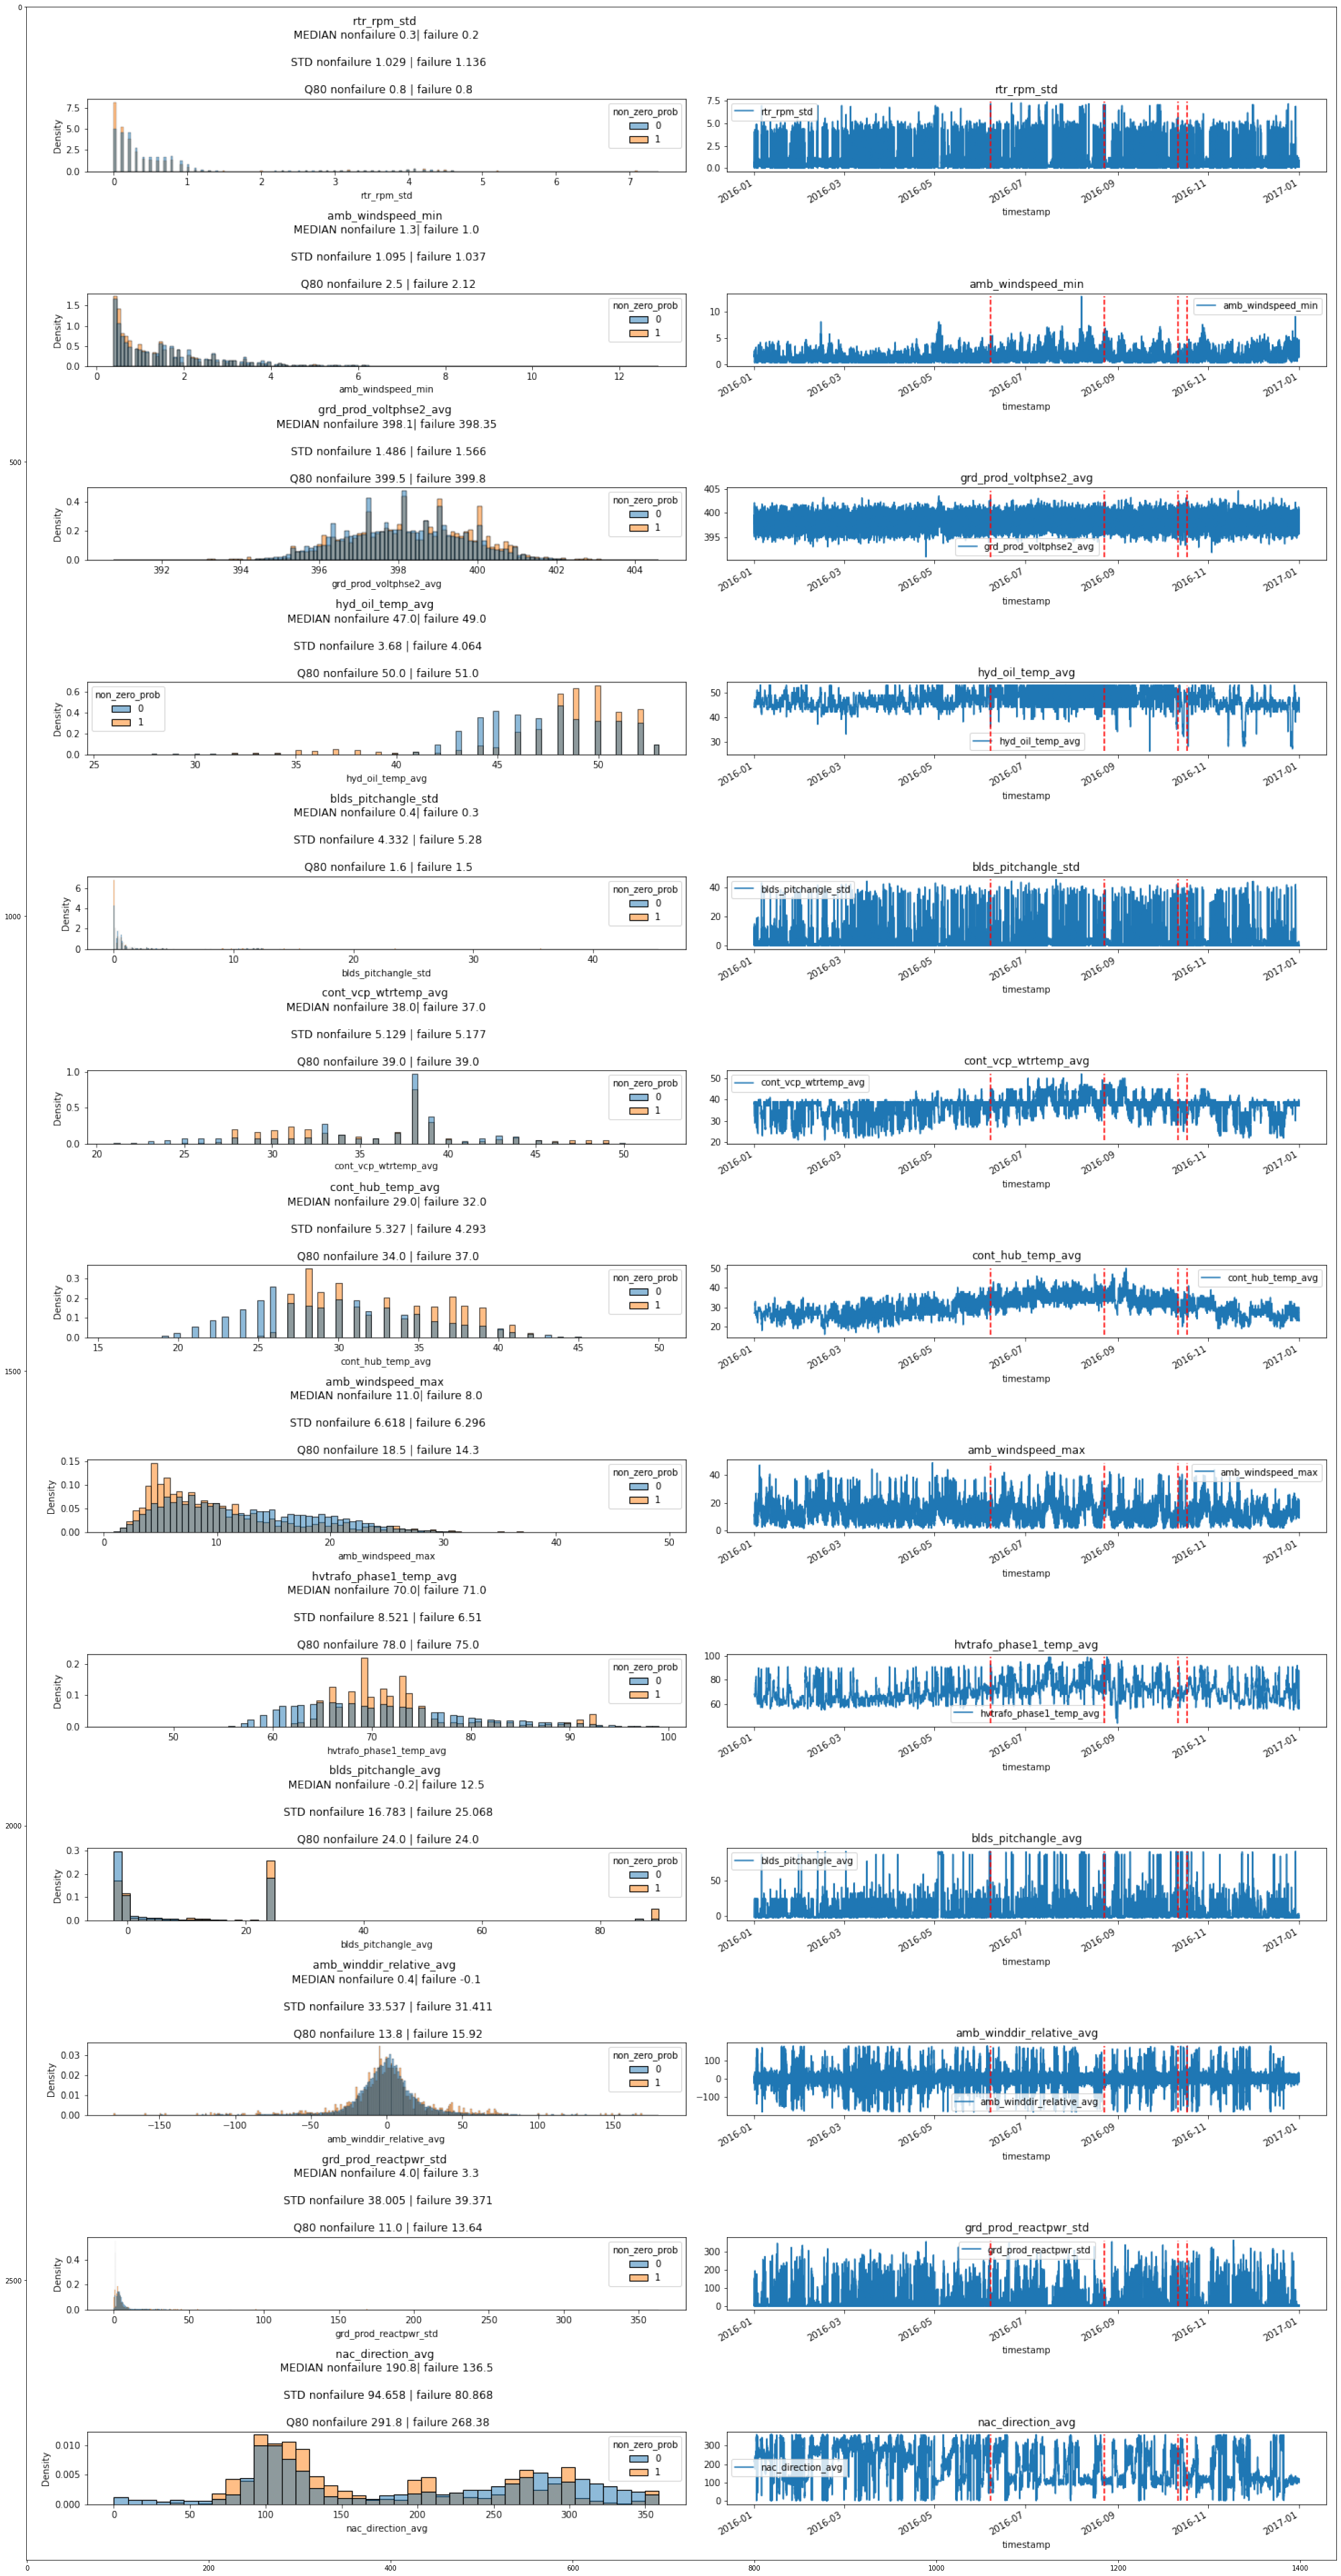

In [41]:

filename = 'histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

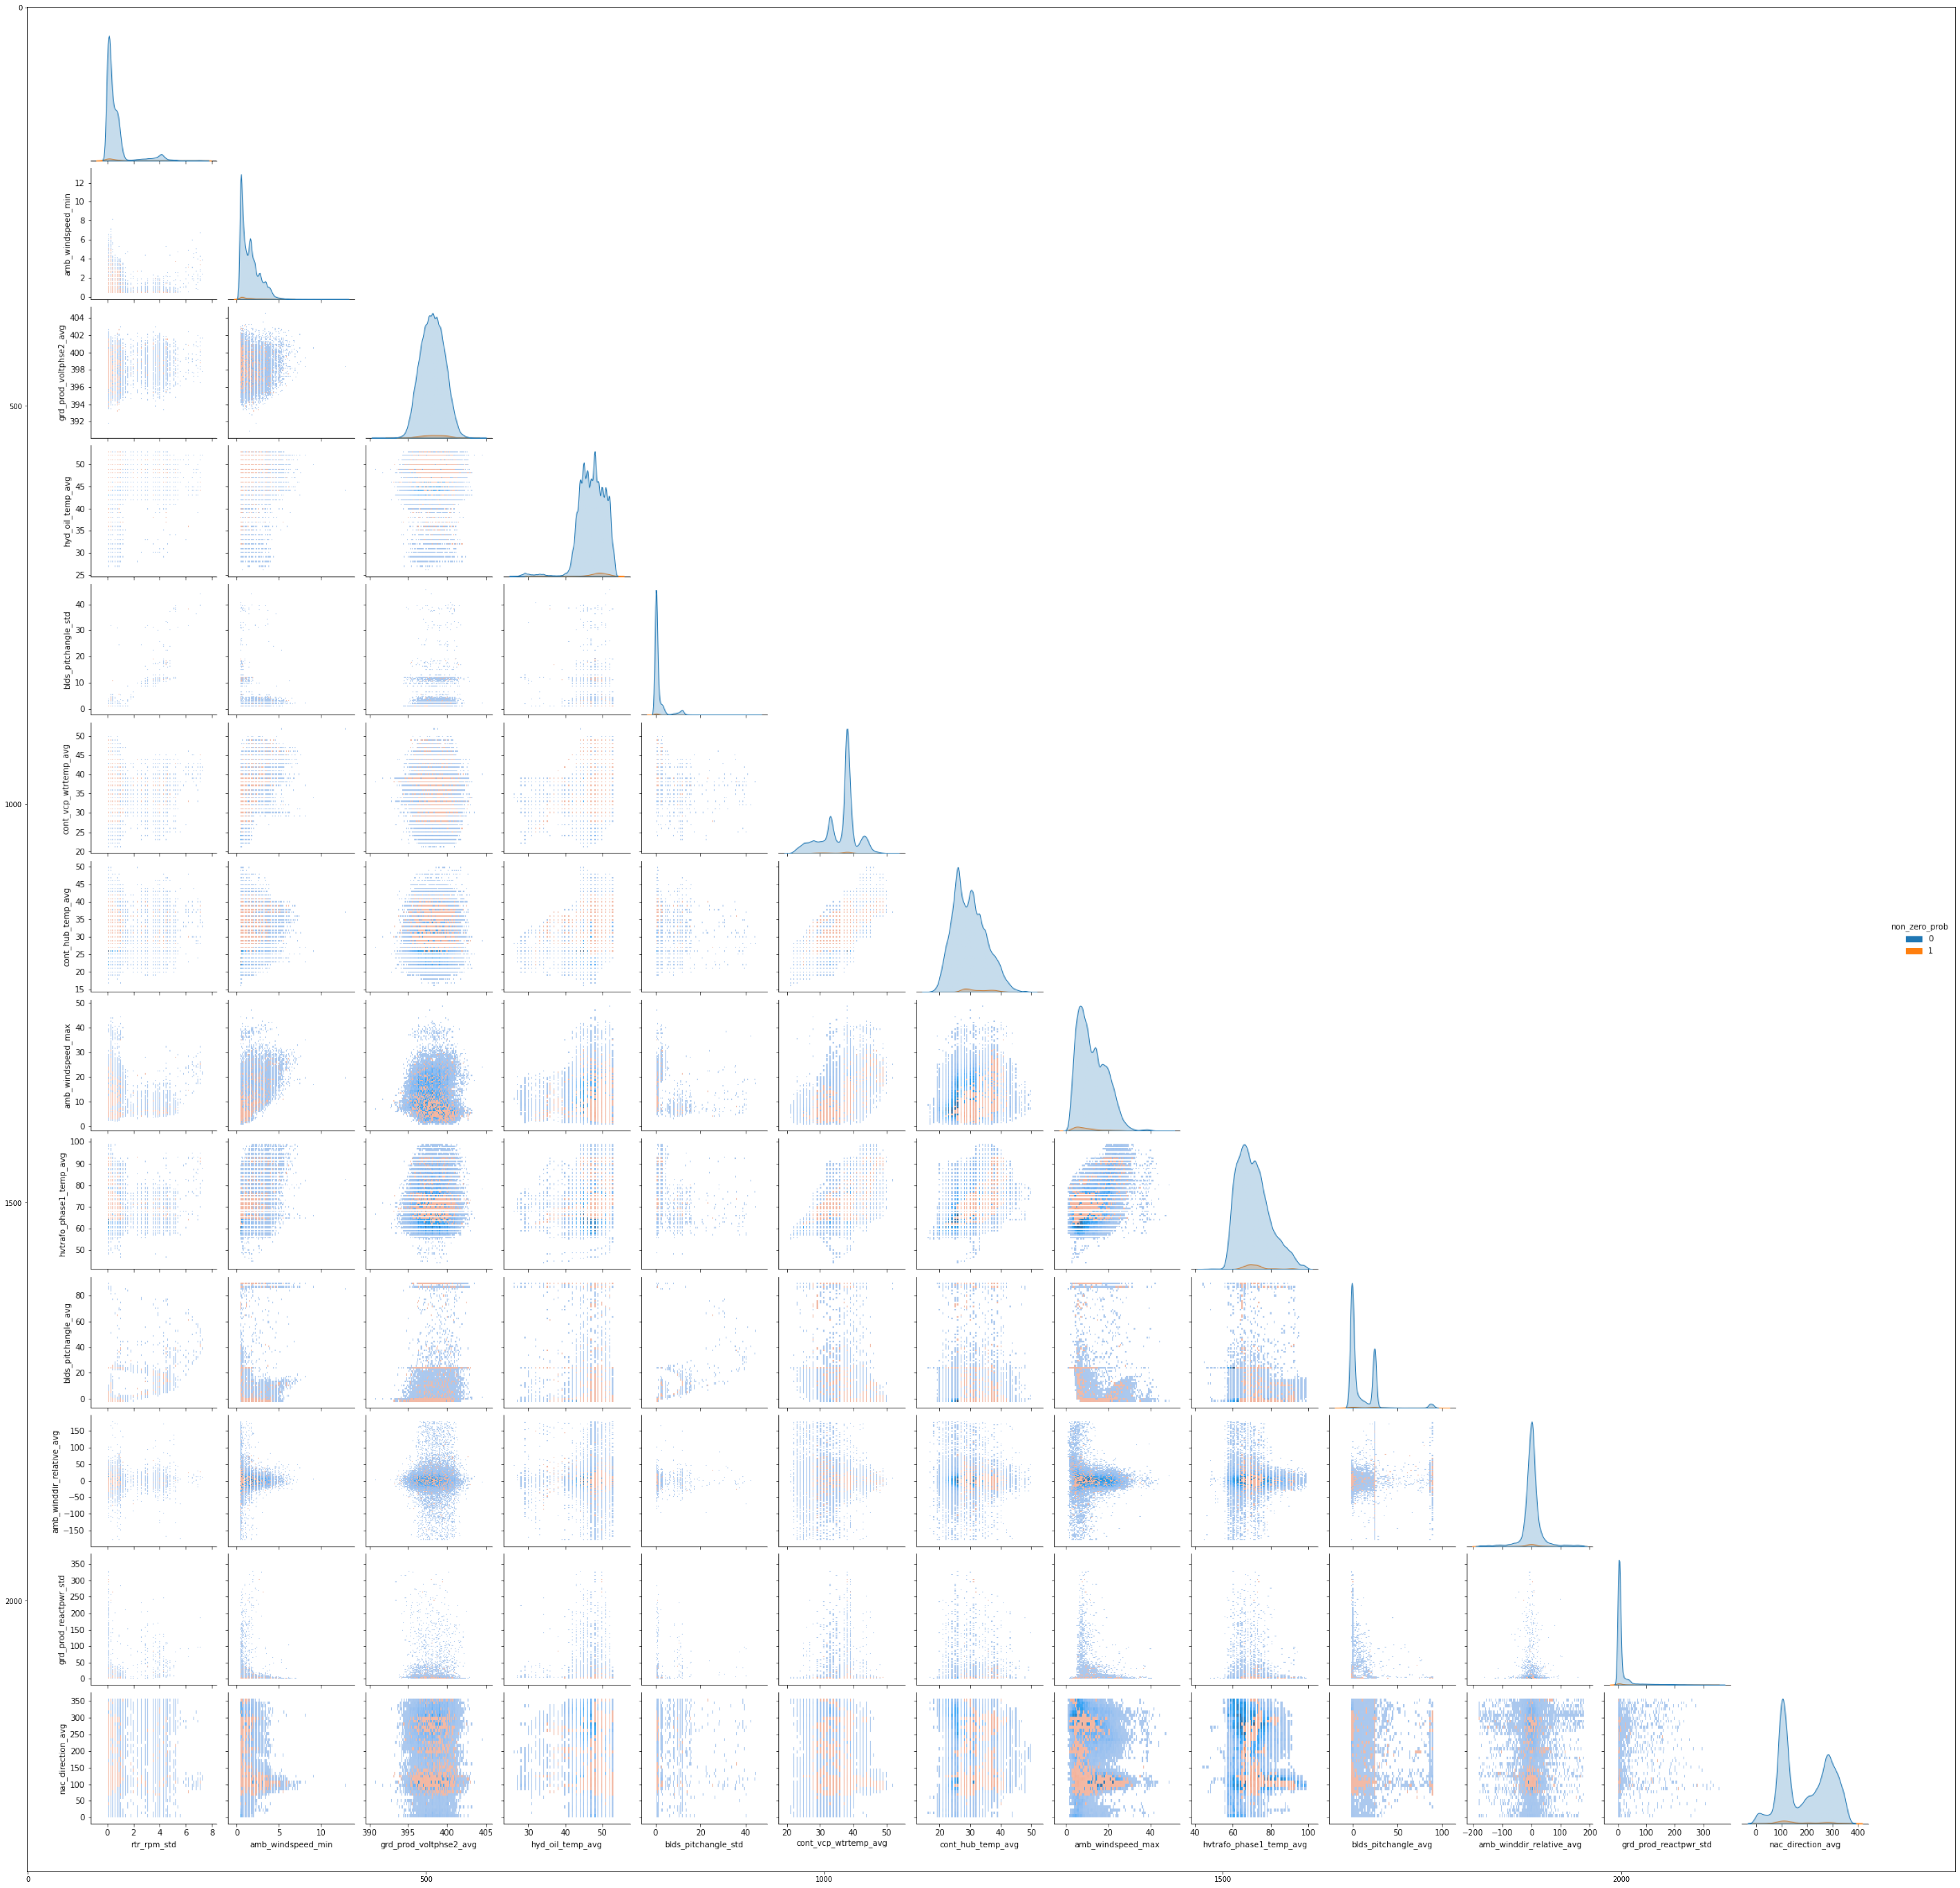

In [42]:

filename = 'float_tags_distribution'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(50,50))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

# Signals of Pre Failure
- low -> amb_windspeed_min 
- high -> blds_pitchangle_avg
- high -> amb_winddir_relative_avg
- high -> grd_prod_psbleind_std
- high -> grd_prod_reactpwr_min

# Validation

In [43]:
test_set = input_prob_failure(df=test_set)
test_set

DONE!


turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2017-01-01 00:00:00        T09           294.400     1586.800   
2017-01-01 00:10:00        T09           474.800     1566.900   
2017-01-01 00:20:00        T09           503.300     1587.200   
2017-01-01 00:30:00        T09           532.200     1629.900   
2017-01-01 00:40:00        T09           388.200     1501.900   
...                        ...               ...          ...   
2017-08-31 23:20:00        T09            65.800     1249.600   
2017-08-31 23:30:00        T09           -29.100     1146.300   
2017-08-31 23:40:00        T09           -28.700     1176.000   
2017-08-31 23:50:00        T09           -14.700     1249.300   
2017-09-01 00:00:00        T09            63.100     1251.900   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2017-01-01 00:00:00                0.100           759.600   
2017-01-01 00:10:00               -1.600           735.600   
2017-01-01 00:20:00               -1.500           789.400   
2017-01-01 00:30:00                0.000          1011.000   
2017-01-01 00:40:00               -1.300           599.400   
...                                  ...               ...   
2017-08-31 23:20:00                0.600           175.000   
2017-08-31 23:30:00               45.600            25.700   
2017-08-31 23:40:00               24.000            20.000   
2017-08-31 23:50:00                0.900            66.200   
2017-09-01 00:00:00                0.200           188.200   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2017-01-01 00:00:00              107.300             39.000   
2017-01-01 00:10:00              108.800             40.000   
2017-01-01 00:20:00              119.800             40.000   
2017-01-01 00:30:00              122.200             40.000   
2017-01-01 00:40:00              128.800             41.000   
...                                  ...                ...   
2017-08-31 23:20:00              123.100             42.000   
2017-08-31 23:30:00              112.200             43.000   
2017-08-31 23:40:00              105.600             43.000   
2017-08-31 23:50:00              105.200             43.000   
2017-09-01 00:00:00              103.500             44.000   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2017-01-01 00:00:00              3.700               -121.200   
2017-01-01 00:10:00              3.900               -109.500   
2017-01-01 00:20:00              1.900               -118.700   
2017-01-01 00:30:00              3.000               -124.300   
2017-01-01 00:40:00              4.100               -104.100   
...                                ...                    ...   
2017-08-31 23:20:00              3.400                -80.500   
2017-08-31 23:30:00              0.500                  0.300   
2017-08-31 23:40:00              1.600                309.100   
2017-08-31 23:50:00              2.000                224.300   
2017-09-01 00:00:00              2.600                -83.900   

                     grd_prod_curphse1_avg  ...  grd_prod_cosphi_avg  \
timestamp                                   ...                        
2017-01-01 00:00:00                624.800  ...                1.000   
2017-01-01 00:10:00                601.100  ...                1.000   
2017-01-01 00:20:00                645.500  ...                1.000   
2017-01-01 00:30:00                826.800  ...                1.000   
2017-01-01 00:40:00                490.300  ...                1.000   
...                                    ...  ...                  ...   
2017-08-31 23:20:00                157.900  ...                0.900   
2017-08-31 23:30:00                 58.000  ...      

In [44]:
red_tags_float

['rtr_rpm_std',
 'amb_windspeed_min',
 'grd_prod_voltphse2_avg',
 'hyd_oil_temp_avg',
 'blds_pitchangle_std',
 'cont_vcp_wtrtemp_avg',
 'cont_hub_temp_avg',
 'amb_windspeed_max',
 'hvtrafo_phase1_temp_avg',
 'blds_pitchangle_avg',
 'amb_winddir_relative_avg',
 'grd_prod_reactpwr_std',
 'nac_direction_avg']

In [45]:
plot_histogram_per_variable_failure(df=test_set, turbine=turbine, filename='test_histogram_per_variable_failure', tags=red_tags_float)

DONE!


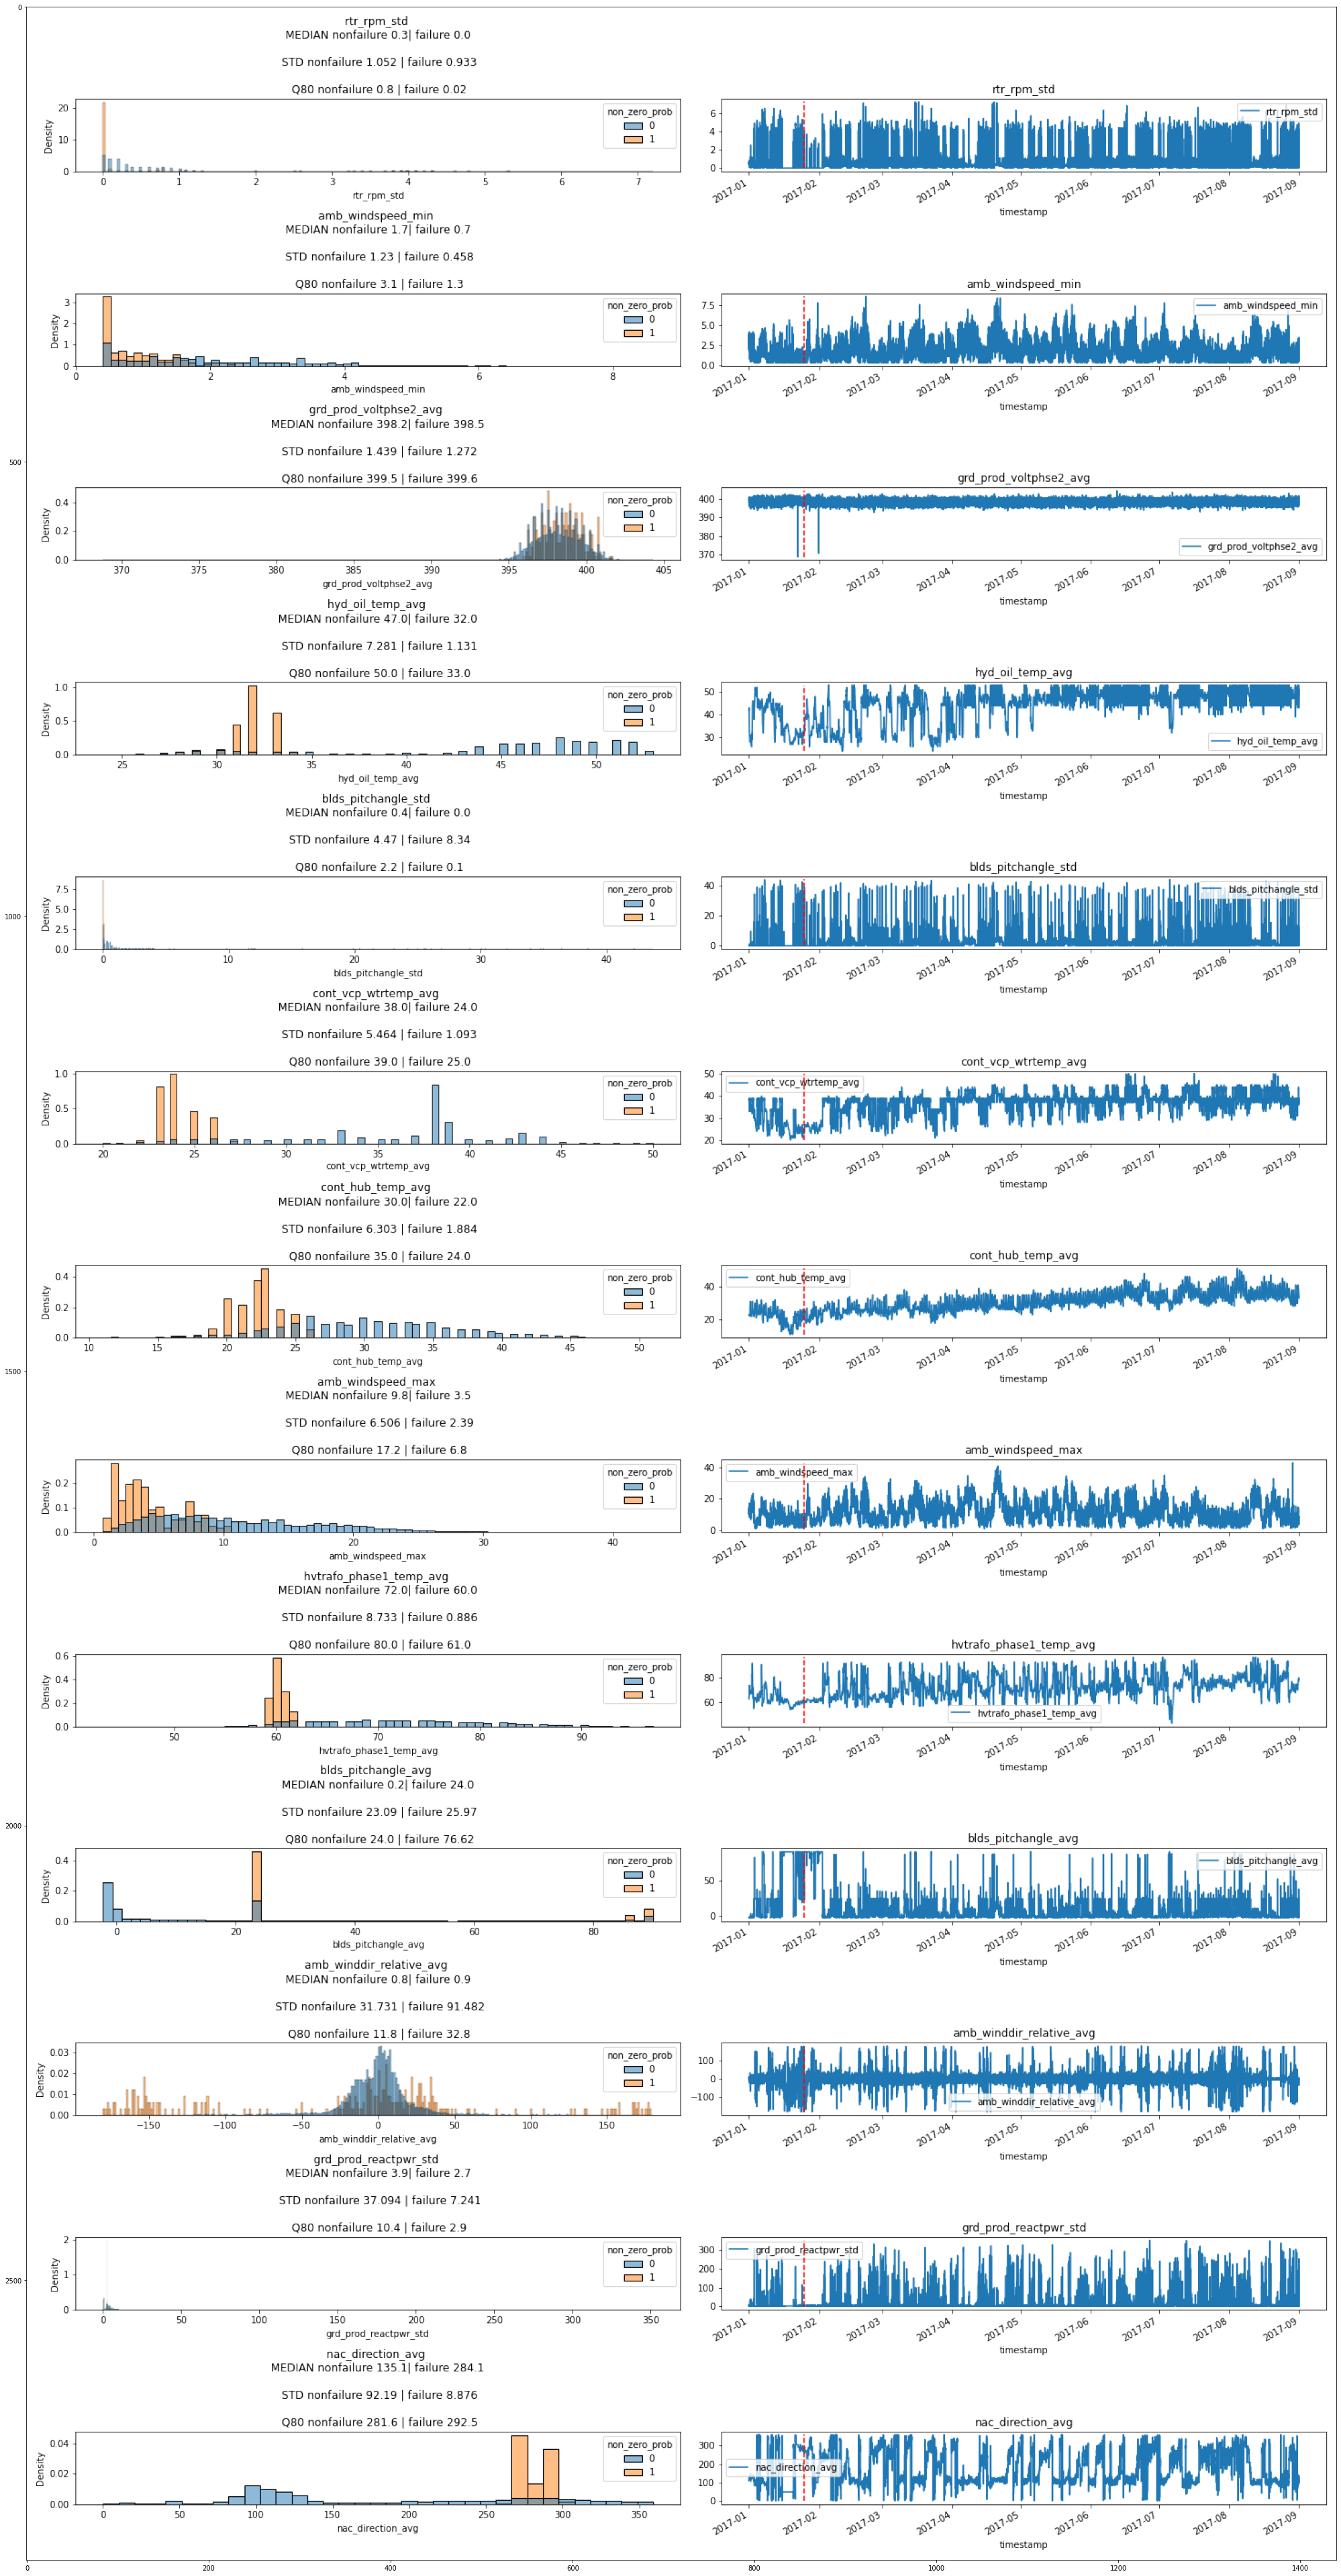

In [46]:

filename = 'test_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

In [47]:
    filename = 'compare_histogram_per_variable_failure'

    tags = red_tags_float.copy()
    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        df = training_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TRAINING_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        df = test_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TEST_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

DONE!


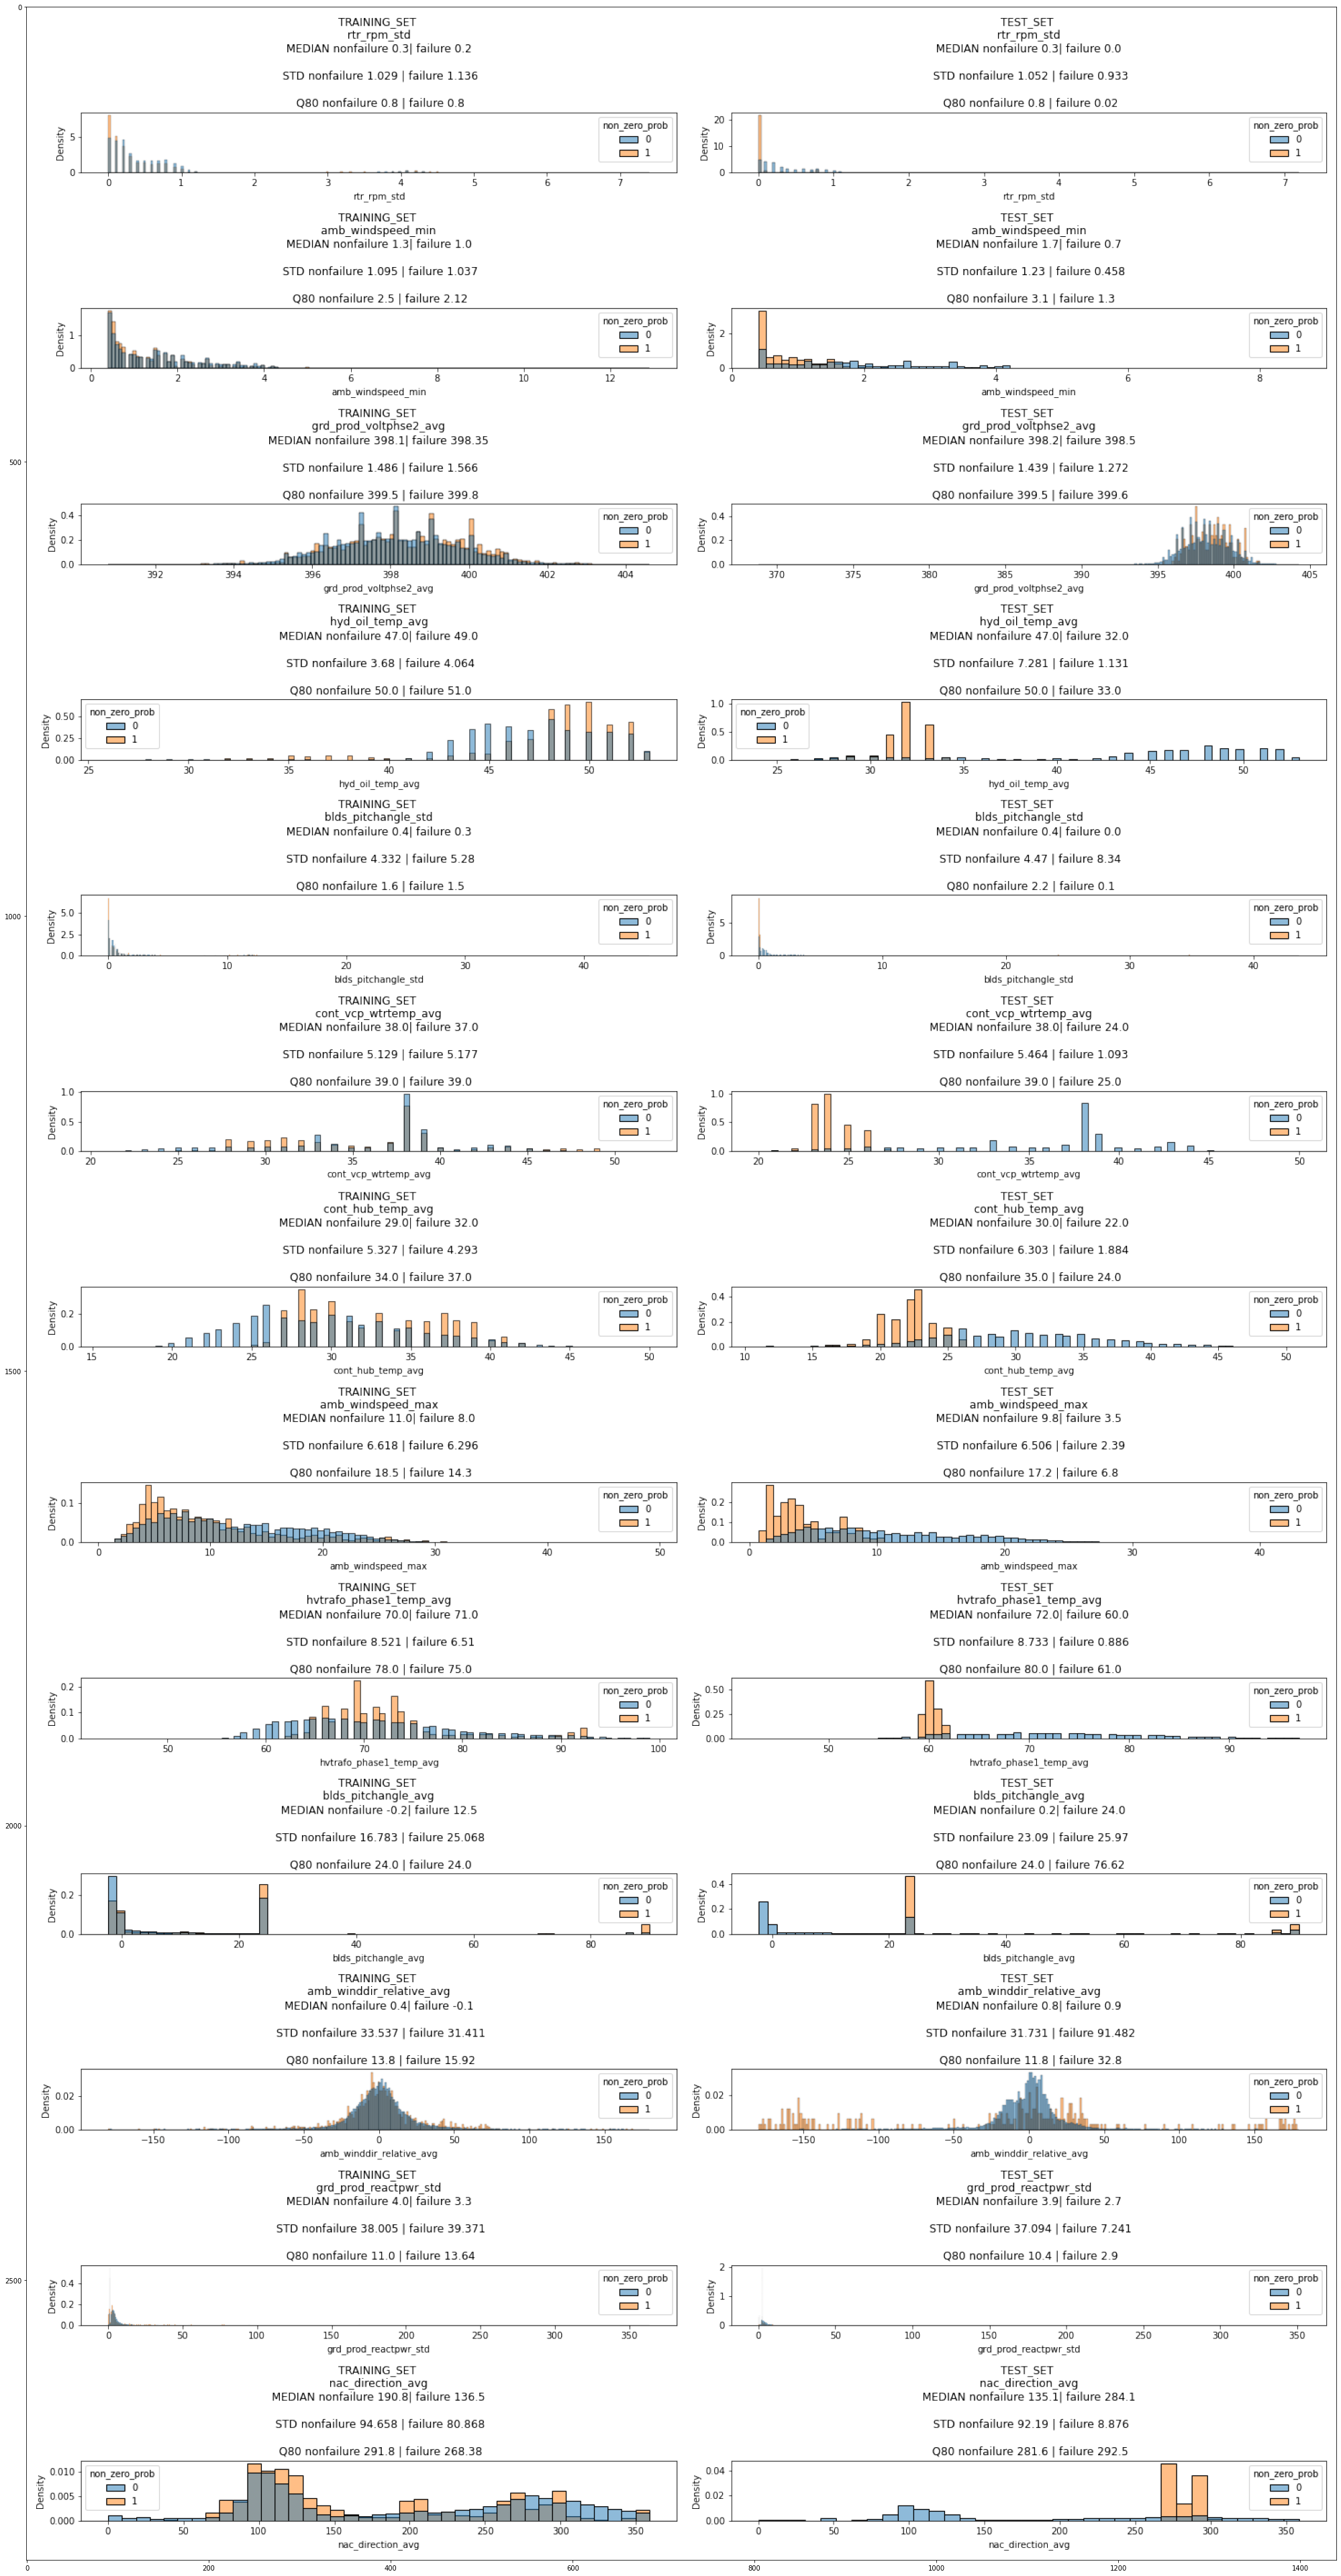

In [48]:

filename = 'compare_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()